In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


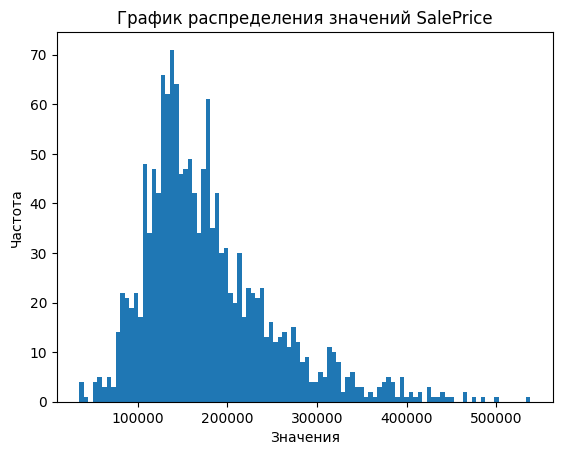

In [3]:
df = df.loc[df['SalePrice'] <= 540000]
plt.hist(df["SalePrice"], bins=100)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('График распределения значений SalePrice')
plt.show()

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = df.drop(['Id'], axis=1)

numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = make_pipeline(SimpleImputer(), StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse_output=False)
)

preprocessor = make_column_transformer(
    (numeric_transformer, numerical_ix),
    (categorical_transformer, categorical_ix),
    verbose_feature_names_out=False,
).set_output(transform="pandas")

df = preprocessor.fit_transform(df)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.072291,-0.220264,-0.203283,0.672492,-0.518139,1.056161,0.882566,0.542604,0.592668,-0.288023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.871878,0.466887,-0.087963,-0.060539,2.173835,0.161697,-0.425232,-0.580687,1.197549,-0.288023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.072291,-0.082834,0.077496,0.672492,-0.518139,0.989904,0.834129,0.347747,0.103427,-0.288023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.308333,-0.449315,-0.092977,0.672492,-0.518139,-1.859128,-0.715853,-0.580687,-0.497006,-0.288023,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.072291,0.650127,0.379334,1.405522,-0.518139,0.956776,0.737255,1.425190,0.479253,-0.288023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.072291,-0.357694,-0.256731,-0.060539,-0.518139,0.923648,0.737255,-0.580687,-0.977352,-0.288023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.871878,0.695937,0.270532,-0.060539,0.379186,0.227954,0.156012,0.101311,0.779470,0.723726,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.308333,-0.174454,-0.143918,0.672492,3.071160,-0.997793,1.027876,-0.580687,-0.365800,-0.288023,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.871878,-0.082834,-0.076230,-0.793570,0.379186,-0.699638,0.543507,-0.580687,-0.868384,6.099032,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


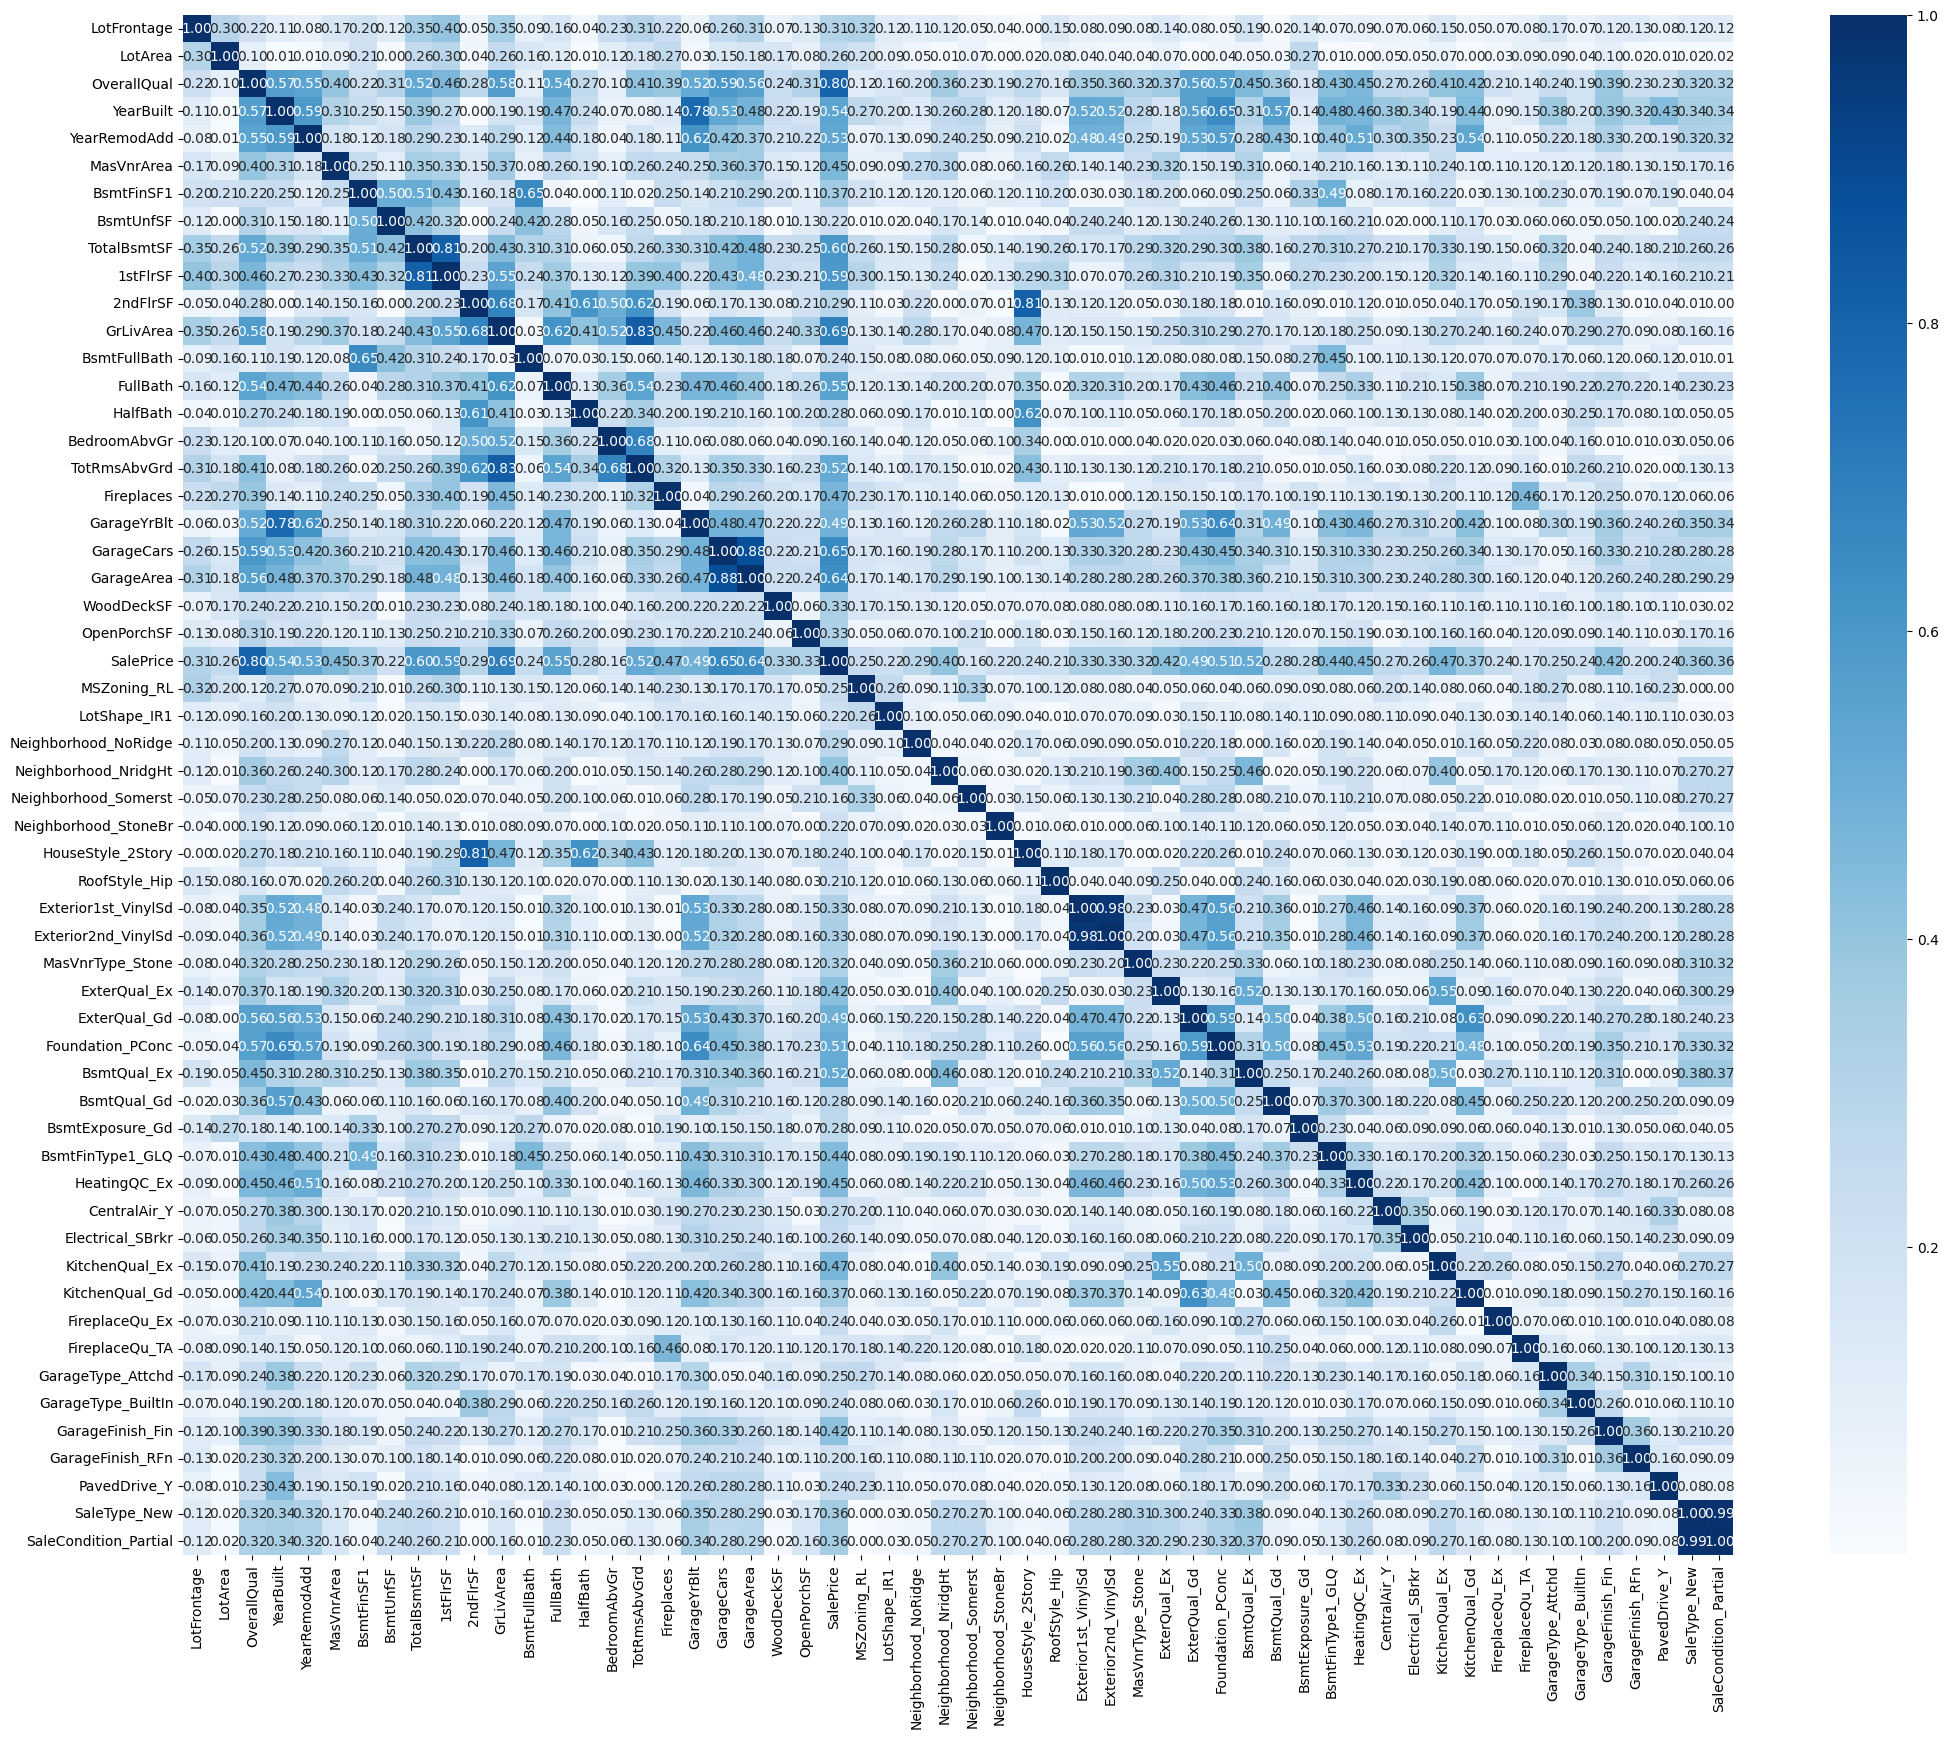

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenQual_Gd,FireplaceQu_Ex,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_RFn,PavedDrive_Y,SaleType_New,SaleCondition_Partial
0,-0.220264,-0.203283,0.672492,1.056161,0.882566,0.542604,0.592668,-0.944182,-0.454369,-0.793106,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.466887,-0.087963,-0.060539,0.161697,-0.425232,-0.580687,1.197549,-0.639807,0.488907,0.273893,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.082834,0.077496,0.672492,0.989904,0.834129,0.347747,0.103427,-0.299089,-0.305675,-0.624909,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.449315,-0.092977,0.672492,-1.859128,-0.715853,-0.580687,-0.497006,-0.058315,-0.686702,-0.517158,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.650127,0.379334,1.405522,0.956776,0.737255,1.425190,0.479253,-0.171888,0.217076,-0.033592,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357694,-0.256731,-0.060539,0.923648,0.737255,-0.580687,-0.977352,0.879795,-0.229005,-0.538182,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1456,0.695937,0.270532,-0.060539,0.227954,0.156012,0.101311,0.779470,0.052986,1.139442,2.405263,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,-0.174454,-0.143918,0.672492,-0.997793,1.027876,-0.580687,-0.365800,0.707164,0.233340,0.079416,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1458,-0.082834,-0.076230,-0.793570,-0.699638,0.543507,-0.580687,-0.868384,-1.284900,0.061413,-0.209673,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
import numpy as np


subset_corr_input_features = []
for column in df.columns:
    if np.corrcoef(df['SalePrice'],df[column])[0,1]>0.15:
        subset_corr_input_features.append(column)

f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(np.abs(df[subset_corr_input_features].corr()), annot = True, fmt = ".2f", \
cmap="Blues")
plt.show()

for i in subset_corr_input_features:
    new_df = df[subset_corr_input_features]
new_df

In [6]:
y = df["SalePrice"]
X = df.drop(['SalePrice'], axis=1)

In [7]:
model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

In [8]:
from sklearn.metrics import r2_score


score = r2_score(y, predictions)
print(score)

0.9378983833342953
